In [1]:
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModel

In [4]:
#ckpt = "./backup/checkpoint-34000"
#ckpt = "./checkpoint-100000"
#ckpt = "./tokenizer_bpe_256_v5"
#ckpt = "./tokenizer_unigram_251_v2"
#ckpt = "./results_nc_first_pass/checkpoint-10000"
ckpt = "./nc_small_span_50000/checkpoint-50000"

In [5]:
tokenizer = AutoTokenizer.from_pretrained(ckpt)

In [6]:
# chr5:3,566,700-3,567,700

In [7]:
seq = "ATAAACATATCATAAATAAGATCAATATTAATAAAATAAATAGTTTTTTTTACGGGACGGATTGGCGGGACGAGTTTAGCAGGACGTAACTTAATAACAATTGTAAACTATAAAATAAAAATATTTTATAGATAGATACAATTTGCAAACTTTTATATATACTAACTTAAAAAAAAAATATTGTCCCCTGCGGTATAAGACGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGTGTTTAATTAGTTGCTTAACATATAACAATTGACTGAGTTCTTCATTGCTATAATTCCTGAAACCCACCCAATATTAGACTGTCGTGTGTTTCTCATATTG"
len(seq)

1000

In [8]:
tokenized_input = tokenizer(seq, return_token_type_ids=False, return_tensors="pt")
tokenized_input

{'input_ids': tensor([[0, 5, 8,  ..., 8, 7, 1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}

In [9]:
tokenizer.decode(tokenizer(seq)["input_ids"])

2022-03-30 10:44:07.882418: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64
2022-03-30 10:44:07.882444: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'[CLS] a t a a a c a t a t c a t a a a t a a g a t c a a t a t t a a t a a a a t a a a t a g t t t t t t t t a c g g g a c g g a t t g g c g g g a c g a g t t t a g c a g g a c g t a a c t t a a t a a c a a t t g t a a a c t a t a a a a t a a a a a t a t t t t a t a g a t a g a t a c a a t t t g c a a a c t t t t a t a t a t a c t a a c t t a a a a a a a a a a t a t t g t c c c c t g c g g t a t a a g a c g g g t t a a a a a t c t a g t t g t t a t t a t t a a a g g a a a t a a a a t a t c c t c a t a a a a c a a t t t g t t g t a a t c t a t c t t t g g g c t a a t g t t c t t a t c c t a c a a g a c g a a c c c t g a c c g t a t t c g t c g t a g a a a a a a a a t t g c t t c g a t c c c a t c a t t g a g t t c a a t a a t c g g c g c a c a a a g g c c g a t t c a t a a a a a c t c t a g g c c c a t t a a a g t a a a g c c c a t t c t c a a c c c t a t c c a g t c t c c c t g t a t a t a t a t a t t t a c g a c a c c a a c c c a g c g t t g a t a t t t a a t t t t c t t c a g t c a g

In [10]:
tokens = tokenizer.decode(tokenizer(seq)["input_ids"]).split(" ")[1:-1]
len(tokens)

1000

In [11]:
model = AutoModel.from_pretrained(ckpt)
model.eval()

Some weights of the model checkpoint at ./nc_small_span_50000/checkpoint-50000 were not used when initializing LongformerModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing LongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LongformerModel were not initialized from the model checkpoint at ./nc_small_span_50000/checkpoint-50000 and are newly initialized: ['longformer.pooler.dense.weight', 'longformer.pooler.dense.bias']
You should probably TRA

LongformerModel(
  (embeddings): LongformerEmbeddings(
    (word_embeddings): Embedding(14, 256, padding_idx=3)
    (position_embeddings): Embedding(1024, 256, padding_idx=3)
    (token_type_embeddings): Embedding(2, 256)
    (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): LongformerEncoder(
    (layer): ModuleList(
      (0): LongformerLayer(
        (attention): LongformerAttention(
          (self): LongformerSelfAttention(
            (query): Linear(in_features=256, out_features=256, bias=True)
            (key): Linear(in_features=256, out_features=256, bias=True)
            (value): Linear(in_features=256, out_features=256, bias=True)
            (query_global): Linear(in_features=256, out_features=256, bias=True)
            (key_global): Linear(in_features=256, out_features=256, bias=True)
            (value_global): Linear(in_features=256, out_features=256, bias=True)
          )
          (outp

In [12]:
tokenized_input["global_attention_mask"] = torch.zeros_like(tokenized_input["input_ids"])
tokenized_input["global_attention_mask"][:, 0] = 1
tokenized_input

{'input_ids': tensor([[0, 5, 8,  ..., 8, 7, 1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]]), 'global_attention_mask': tensor([[1, 0, 0,  ..., 0, 0, 0]])}

In [13]:
output = model(**tokenized_input, output_attentions=True)

In [14]:
torch.cat(output.global_attentions).shape

torch.Size([8, 8, 1020, 1])

In [15]:
#output_attentions = torch.cat(output.attentions)
output_attentions = torch.cat(output.attentions)
output_attentions.shape

torch.Size([8, 8, 1002, 22])

In [16]:
#attention_strength = output_attentions.mean(dim=[0,1,2]).detach().numpy()[1:-1]
local_attention_strength = torch.cat(output.attentions).mean(dim=[0,1,2]).detach().numpy()
local_attention_strength.shape

(22,)

In [17]:
global_attention_strength = torch.cat(output.global_attentions).mean(dim=[0,1,3]).detach().numpy()
global_attention_strength.shape

(1020,)

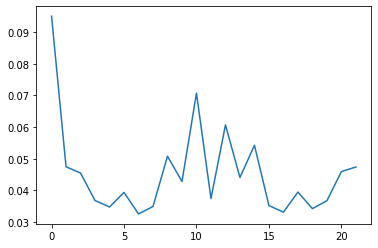

In [18]:
plt.plot(local_attention_strength)

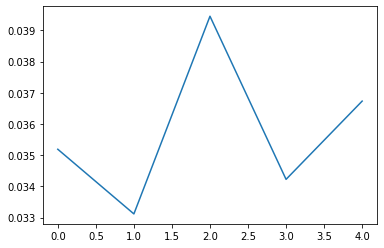

In [19]:
plt.plot(local_attention_strength[15:20])

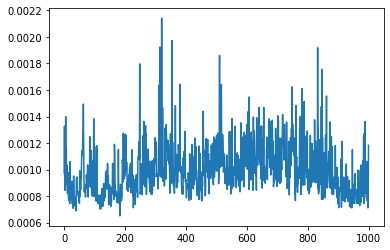

In [20]:
plt.plot(global_attention_strength[1:1001])

In [21]:
# TODO: make sure there are no +-1 errors
def write_bedgraph(tokens, attention_strength, chromosome, start, output_path):
    lines = ['track type=bedGraph name="attention_strength" description="attention_strength" visibility=full\n']
    for token, strength in zip(tokens, attention_strength):
        lines.append(f"{chromosome} {start-1} {start-1+len(token)} {strength}\n")
        start += len(token)
    with open(output_path, "w") as f:
        f.writelines(lines)

In [22]:
write_bedgraph(tokens, global_attention_strength[1:1001], "chr5", 3566700, "test.txt")

In [23]:
!head test.txt 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
track type=bedGraph name="attention_strength" description="attention_strength" visibility=full
chr5 3566699 3566700 0.000974364927969873
chr5 3566700 3566701 0.001327359932474792
chr5 3566701 3566702 0.0009164406219497323
chr5 3566702 3566703 0.0008431818569079041
chr5 3566703 3566704 0.000853569305036217
chr5 3566704 3566705 0.0013989935396239161
chr5 3566705 3566706 0.0008869754965417087
chr5 3566706 3566707 0.001170578645542264
chr5 3566707 3566708 0.0009652463486418128


In [24]:
max(attention_strength)

NameError: name 'attention_strength' is not defined

In [20]:
import numpy as np
np.argmax(attention_strength)

30

In [21]:
np.array(tokens)[np.argsort(attention_strength)[::-1][:20]]

array(['cgggtt', 'tttagca', 'aggcccat', 'gctcttg', 'ttttta', 'cggga',
       'aaataaaa', 'cgaagcc', 'tcttag', 'tcgtcgt', 'gtgtg', 'tgtgtgt',
       'cctgaa', 'gcggt', 'aaatagttt', 'ggacg', 'ggatttgg', 'tgtcgat',
       'agcag', 'aatgtttt'], dtype='<U10')

In [22]:
'atg' in tokens

False

In [23]:
tokens[0]

'ataaac'